# Stock Price Prediction

In [94]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import os 
from datetime import datetime 

import warnings 
warnings.filterwarnings("ignore") 


In [95]:
data = pd.read_csv(r"C:\Users\shrav\Stock prices\big_tech_stock_prices.csv") 
data.shape


(45088, 8)

In [96]:
data.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [97]:
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [98]:
data['date'] = pd.to_datetime(data['date']) 

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45088 non-null  object        
 1   date          45088 non-null  datetime64[ns]
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.8+ MB


In [100]:
data.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


# EDA

#### Analysis of open and close stock prices of companies

In [101]:
companies=["AAPL","ADBE","AMZN","CRM","CSCO","GOOGL","IBM","INTC","META","MSFT","NFLX","NVDA","ORCL","TSLA"]

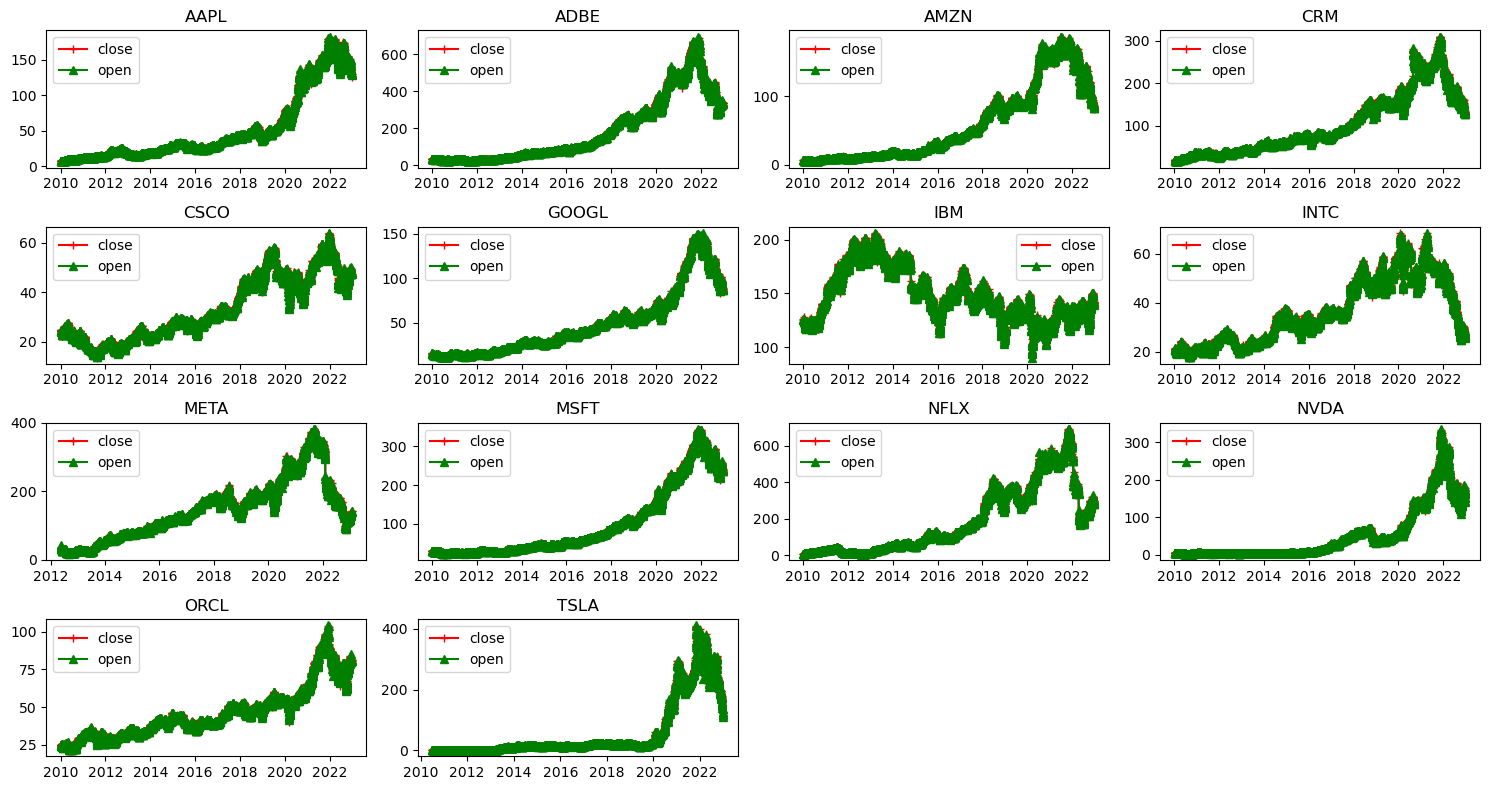

In [102]:
plt.figure(figsize=(15, 8)) 
for index, company in enumerate(companies, 1): 
    plt.subplot(4, 4, index) 
    c = data[data['stock_symbol'] == company] 
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+") 
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^") 
    plt.title(company) 
    plt.legend() 
    plt.tight_layout() 

#### Plot of volume of the 14 stocks as a function of time

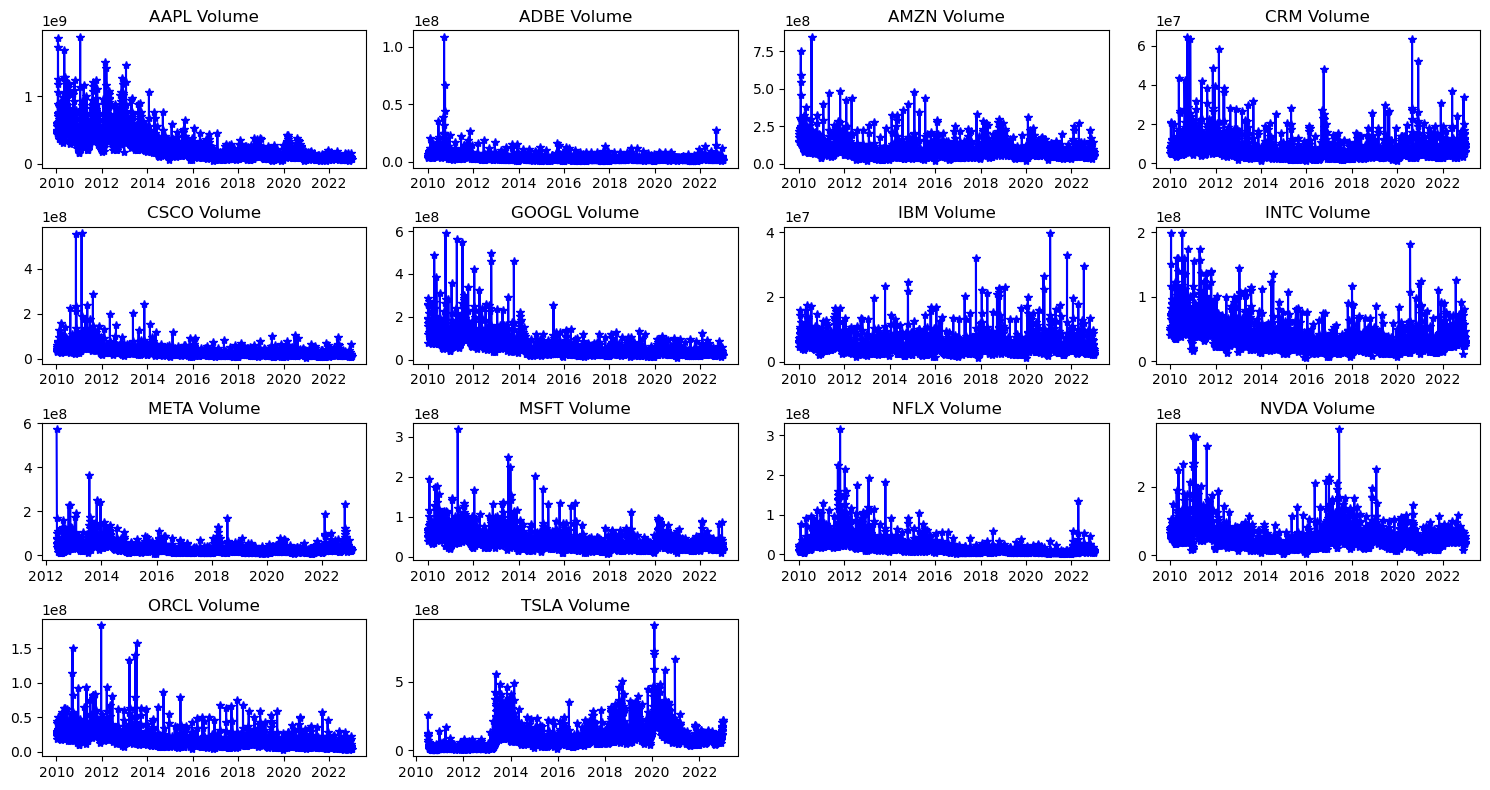

In [103]:
plt.figure(figsize=(15, 8)) 
for index, company in enumerate(companies, 1): 
    plt.subplot(4, 4, index) 
    c = data[data['stock_symbol'] == company] 
    plt.plot(c['date'], c['volume'], c='blue', marker='*') 
    plt.title(f"{company} Volume") 
    plt.tight_layout() 


### Analysing Apple stocks from 2018 to 2022

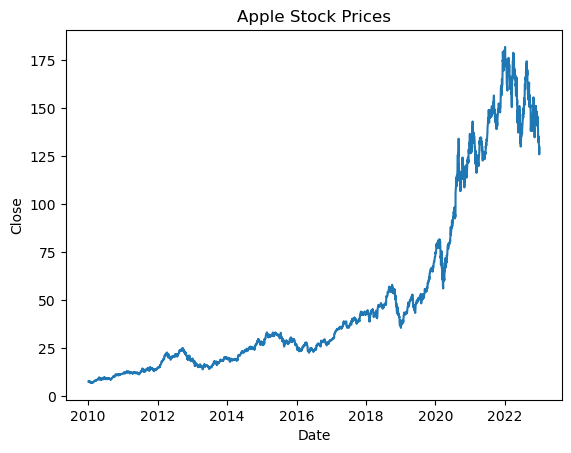

In [104]:
apple = data[data['stock_symbol'] == 'AAPL'] 
prediction_range = apple.loc[(apple['date'] > datetime(2018,1,1)) 
& (apple['date']<datetime(2022,1,1))] 
plt.plot(apple['date'],apple['close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("Apple Stock Prices") 
plt.show()


#### Selecting a subset of the whole data as the training data so that some data is left as a subset for the validation part

In [105]:
close_data = apple.filter(['close']) 
dataset = close_data.values 
training = int(np.ceil(len(dataset) * .95)) 
print(training) 

3108


#### Applying scaling and preparing features and labels that are labelled as x_train and y_train

In [106]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset) 

train_data = scaled_data[0:int(training), :] 
# prepare feature and labels 
x_train = [] 
y_train = [] 

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i, 0]) 

x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 


## Building Gated RNN- LSTM network using TensorFlow

### Using TensorFlow, I created LSTM-gated RNN cells. LSTM is used in Recurrent Neural Networks for sequence models and time series data. LSTM is used to avoid the vanishing gradient issue which is widely occurred in training RNN. We will be using return_sequences = True o stack multiple LSTM in TensorFlow. Since the data is time series varying no activation is applied to the output layer and it remains as 1 node. 

In [107]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
                        return_sequences=True, 
                        input_shape=(x_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(32)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
model.summary 

<bound method Model.summary of <Sequential name=sequential_4, built=True>>

#### While compiling the model three essential parameters need to be provided:
 1. optimiser- A method that helps to optimize the cost function by using gradient descent.
 2. loss- The loss function by which we monitor whether the model is improving with training or not.
 3. metrics- It will help us validate the model by predicting the training and the validation data.

In [108]:
model.compile(optimizer='adam', loss='mean_squared_error') 
history = model.fit(x_train, y_train, epochs=10) 


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0198
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0054
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0037
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0035
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0042
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0028
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0026
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0030
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0023
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0027


#### To predict values, we create the testing data first and then do the model predictions

In [109]:
test_data = scaled_data[training - 60:, :] 
x_test = [] 
y_test = dataset[training:, :] 
for i in range(60, len(test_data)): 
    x_test.append(test_data[i-60:i, 0]) 

x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

# Predictions for the testing data
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 

# Evaluation metrics 
mse = np.mean(((predictions - y_test) ** 2)) 
print("MSE", mse) 
print("RMSE", np.sqrt(mse)) 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
MSE 46.48120288189303
RMSE 6.817712437606402


## Visualisation of the predicted data

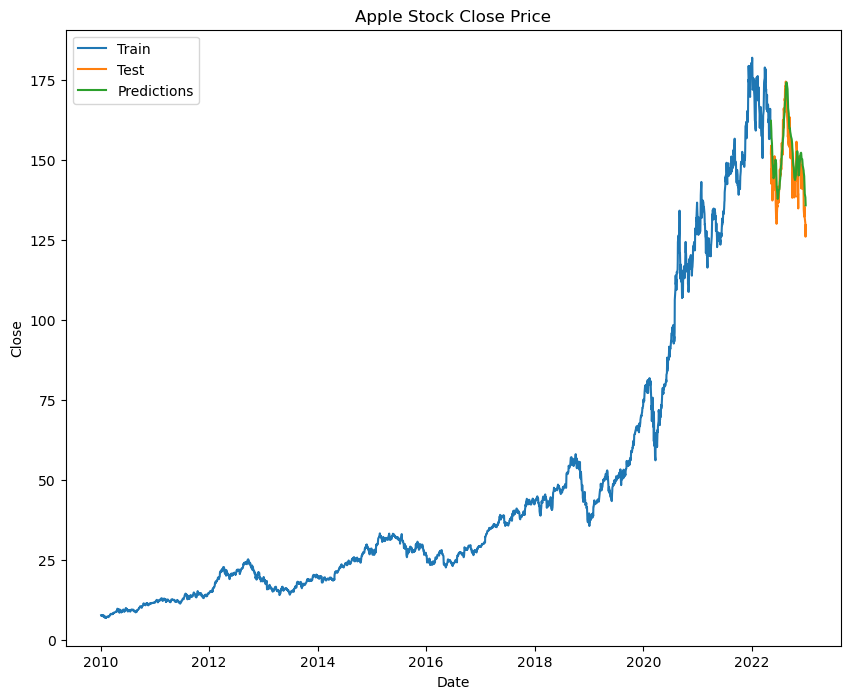

In [110]:
train = apple[:training] 
test = apple[training:] 
test['Predictions'] = predictions 

plt.figure(figsize=(10, 8)) 
plt.plot(train['date'], train['close']) 
plt.plot(test['date'], test[['close', 'Predictions']]) 
plt.title('Apple Stock Close Price') 
plt.xlabel('Date') 
plt.ylabel("Close") 
plt.legend(['Train', 'Test', 'Predictions']) 

# Conclusion:

The entire project involves analysing the stock data of the tech giants from 2018 to 2022 using EDA.
Using the stock data of Apple, we have predicted the future stock prices of Apple.

A deep learning model based on Gated RNN- LSTM network was implemented using TensorFlow.

The model's output was further enhanced by using optimiser that optimised cost function using gradient descent. In the stock price prediction case, the optimization algorithm uses the gradients of the MSE with respect to the model's parameters to update the parameters, aiming to minimize the MSE.


### Result Analysis

From the validated predictions, an MSE of 46.48 was obtained which means that, on average, the squared difference between the actual and predicted stock prices is 46.48.

An RMSE of 6.82 means that, on average, the predicted stock prices deviate from the actual stock prices by about 6.82 units.

### Practical Implications

Prediction Accuracy: Lower values of MSE and RMSE indicate better prediction accuracy. In this case, an RMSE of 6.82 suggests that the model’s stock price predictions are, on average, within 5.875 units of the actual prices.The acceptance of the result depends on the context, such as the typical range or volatility of the stock prices being predicted.